# import library

In [ ]:
!pip3 install tensorflow_text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

#import dataset and pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_disease_not_covid = open("/content/drive/My Drive/Colab Notebooks/DESN9002/disease.csv", "r")
df_disease_not_covid = pd.read_csv(file_disease_not_covid)
file_disease_not_covid.close()
df_disease_not_covid.head(5)

,title,content,url,date,location
0,Malaria vaccine development: Antibodies slow r...,Hi Folks!\n\nThis is a video from my YouTube s...,https://www.reddit.com/r/Malaria/comments/myb8...,1.619367e+09,unavailable
1,Oxford Malaria Vaccine Shows Record High Effic...,NaN,http://www.scientist-cn.org/Document/2021/5GH_...,1.619223e+09,unavailable
2,First vaccine to fully immunize against malari...,NaN,https://academictimes.com/first-vaccine-to-ful...,1.614501e+09,unavailable
3,"20 year old , down with malaria (semi rant)",I'm a 20 year old healthy male who unfortunate...,https://www.reddit.com/r/Malaria/comments/qugr...,1.636984e+09,unavailable
4,"A fast, needle-free malaria detection tool dev...",NaN,https://www.youtube.com/watch?v=L3YsZRqtV3E,1.670694e+09,unavailable


In [ ]:
df_disease_not_covid["text"] = df_disease_not_covid['content'].str.cat(df_disease_not_covid['title'],sep=' ')
df_disease_not_covid = df_disease_not_covid.dropna(subset = ['text'])
df_disease_not_covid.head(5)

,title,content,url,date,location,text
0,Malaria vaccine development: Antibodies slow r...,Hi Folks!\n\nThis is a video from my YouTube s...,https://www.reddit.com/r/Malaria/comments/myb8...,1.619367e+09,unavailable,Hi Folks!\n\nThis is a video from my YouTube s...
3,"20 year old , down with malaria (semi rant)",I'm a 20 year old healthy male who unfortunate...,https://www.reddit.com/r/Malaria/comments/qugr...,1.636984e+09,unavailable,I'm a 20 year old healthy male who unfortunate...
7,Malarone or Mefloquine Malaria prophylaxis?,"In a few weeks, I will be going to Ghana, situ...",https://www.reddit.com/r/Malaria/comments/sn0o...,1.644267e+09,unavailable,"In a few weeks, I will be going to Ghana, situ..."
10,"Hello, why do white people freak about about m...",I’m West African. I used to get Malaria all th...,https://www.reddit.com/r/Malaria/comments/do21...,1.572225e+09,unavailable,I’m West African. I used to get Malaria all th...
13,Any medical professionals able to explain a fe...,"Hi there, hoping there's someone who knows the...",https://www.reddit.com/r/Malaria/comments/y3b3...,1.665697e+09,unavailable,"Hi there, hoping there's someone who knows the..."


In [ ]:
df_disease_not_covid_400 = df_disease_not_covid.drop(columns = ['title', 'content', 'url', 'date', 'location']).sample(400)
df_disease_not_covid_400['label'] = 1
df_disease_not_covid_400

,text,label
269,I am writing this post as a form of anxiety do...,1
321,\nThis is gonna be weird to say but my dating ...,1
203,I just want this post to help anyone who has b...,1
166,Hello everyone! A reminder that tonight at 8pm...,1
154,"Hi all, \n\nI tested positive for via quantife...",1
...,...,...
334,So to my doctor called me this morning before ...,1
258,HIV Scare\n\nWanted to tell my story. Happily ...,1
164,3 months into treatment for lymph node TB. Jus...,1
356,I don't think anyone will understand how much ...,1


In [ ]:
file_covid = open("/content/drive/My Drive/Colab Notebooks/DESN9002/covid19_tweets.csv", "r")
df_covid = pd.read_csv(file_covid)
file_covid.close()
df_covid = df_covid.dropna()
df_covid

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179101,New Jersey Herald,"Newton, NJ","The New Jersey Herald, a daily newspaper in Ne...",2010-01-07 18:19:37,6274,162,38,False,2020-08-29 19:44:27,Wallkill school nurse adds COVID-19 monitoring...,"['nurses', 'COVID19', 'coronavirus', 'schools']",SocialNewsDesk,False
179102,Pris,T.O.,"A/V/L Techie, camera op. but twitter has becom...",2008-12-31 16:16:12,251,160,627,False,2020-08-29 19:44:23,"we have reached 25mil cases of #covid19, world...",['covid19'],Twitter Web App,False
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False


In [ ]:
df_covid_100 = df_covid[['text']].sample(100)
df_covid_100['label'] = 1
df_covid_100

,text,label
74897,A possible way for speeding up #COVID19 test r...,1
14482,"NEW RECORD TODAY! #Corona 24-hour Update, Endi...",1
26657,How can ESG #investment strategies provide gre...,1
163644,@Reuters Grass is growing outside as we stay i...,1
56369,#Hope #USA This is what happens when we don't ...,1
...,...,...
23417,#TheANTIGEN’s COVID-19 mini-series is coming t...,1
11720,"#COVID19 India UPDATE:\n\n-Total Cases - 1,336...",1
166180,"GOOD NEWS: OU reports of the 4,516 students wh...",1
82186,What are you doing to pivot?\n\nThe possibilit...,1


In [ ]:
df_positive = pd.concat([df_disease_not_covid_400, df_covid_100])
df_positive

,text,label
269,I am writing this post as a form of anxiety do...,1
321,\nThis is gonna be weird to say but my dating ...,1
203,I just want this post to help anyone who has b...,1
166,Hello everyone! A reminder that tonight at 8pm...,1
154,"Hi all, \n\nI tested positive for via quantife...",1
...,...,...
23417,#TheANTIGEN’s COVID-19 mini-series is coming t...,1
11720,"#COVID19 India UPDATE:\n\n-Total Cases - 1,336...",1
166180,"GOOD NEWS: OU reports of the 4,516 students wh...",1
82186,What are you doing to pivot?\n\nThe possibilit...,1


In [ ]:
file_general = open("/content/drive/My Drive/Colab Notebooks/DESN9002/India.csv", "r")
df_general = pd.read_csv(file_general)
file_general.close()
df_general

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1547968198808858624,1547968198808858624,1657899353000.0,2022-07-15 15:35:53,0,NaN,We may have many problems in #India but we als...,en,"['india', 'usa']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1547968083750400004,1547968083750400004,1657899325000.0,2022-07-15 15:35:25,0,NaN,"Let’s acknowledge and identify exhaustion, hel...",en,"['mttalk', 'india']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1547968065966841857,1546146173102485504,1657899321000.0,2022-07-15 15:35:21,0,NaN,@Adani_Elec_Mum Yes im still waiting for your ...,en,"['india', 'adanigroup', 'adani']",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Adani_Elec_Mum', 'name': 'Ad...",NaN,NaN,NaN,NaN
3,3,1547968055187124226,1547968055187124226,1657899318000.0,2022-07-15 15:35:18,0,NaN,Opaque Watercolor Supervision watercolor paint...,und,"['supervision', 'israelwatercolor', '水彩画', 'wa...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1547968036002340868,1547968036002340868,1657899314000.0,2022-07-15 15:35:14,0,NaN,⚡بھارتی فوجی نے اپنے ہی دو ساتھیوں کو مار کر خ...,ur,['india'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,9111,1547491085332668418,1547491085332668418,1657785600000.0,2022-07-14 08:00:00,0,NaN,Unser NORD E-Shop ist nun auch in Indien verfü...,de,"['norddrivesystems', 'shop', 'india']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9113,9112,1547490970903592960,1547490970903592960,1657785573000.0,2022-07-14 07:59:33,0,NaN,Buy Maa Durga Marble Statue At Reasonable Pric...,en,"['marblemoorti', 'durgamaa', 'durgamata', 'art...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9114,9113,1547490877148483584,1547490877148483584,1657785550000.0,2022-07-14 07:59:10,0,NaN,Koffee with Karan Season 7: शो के लिए करण जौहर...,hi,"['hindinews', 'news', 'today', 'breaking', 'hi...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9115,9114,1547490793560342528,1544199270739640321,1657785530000.0,2022-07-14 07:58:50,0,NaN,Another level of #scams at head office @UIDAI...,en,"['scams', 'india']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df_general_en = df_general[df_general['language'] == 'en']
df_general_en

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1547968198808858624,1547968198808858624,1657899353000.0,2022-07-15 15:35:53,0,NaN,We may have many problems in #India but we als...,en,"['india', 'usa']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1547968083750400004,1547968083750400004,1657899325000.0,2022-07-15 15:35:25,0,NaN,"Let’s acknowledge and identify exhaustion, hel...",en,"['mttalk', 'india']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1547968065966841857,1546146173102485504,1657899321000.0,2022-07-15 15:35:21,0,NaN,@Adani_Elec_Mum Yes im still waiting for your ...,en,"['india', 'adanigroup', 'adani']",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Adani_Elec_Mum', 'name': 'Ad...",NaN,NaN,NaN,NaN
6,6,1547967970961342464,1547967970961342464,1657899298000.0,2022-07-15 15:34:58,0,NaN,"#BA.2.75, aka #Centaurus, appeared to have mut...",en,"['ba', 'centaurus', 'immune', 'virus', 'india'...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,8,1547967675766149121,1547967675766149121,1657899228000.0,2022-07-15 15:33:48,0,NaN,An underappreciated facet of the mess in #SriL...,en,"['srilanka', 'srilanka', 'china', 'india', 'ch...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,9109,1547491093918384130,1547491093918384130,1657785602000.0,2022-07-14 08:00:02,0,NaN,"India reports 20,139 fresh cases, 38 fatalitie...",en,"['publicvibe', 'india', 'covidcases']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9111,9110,1547491086607818752,1547491086607818752,1657785600000.0,2022-07-14 08:00:00,0,NaN,India - Indian leather exports to cross US$6 b...,en,"['exports', 'leather', 'india']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9113,9112,1547490970903592960,1547490970903592960,1657785573000.0,2022-07-14 07:59:33,0,NaN,Buy Maa Durga Marble Statue At Reasonable Pric...,en,"['marblemoorti', 'durgamaa', 'durgamata', 'art...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9115,9114,1547490793560342528,1544199270739640321,1657785530000.0,2022-07-14 07:58:50,0,NaN,Another level of #scams at head office @UIDAI...,en,"['scams', 'india']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df_general_en_filtered = df_general_en[['tweet']]
df_general_en_filtered.columns = ['text']
df_general_en_filtered = df_general_en_filtered.dropna()
df_general_en_filtered['label'] = 0
df_general_200 = df_general_en_filtered.sample(200)
df_general_200

,text,label
7838,"In 1785, Tilka Manjhi led a #tribal rebellion ...",0
1570,#Chinese air forces began defence drill across...,0
6859,@ndtv For reporting wrong uninformed news of #...,0
1549,🔗Learn more about Inventing for Impact at htt...,0
7399,#REINFECTION #BA275 to dance same as #notoriou...,0
...,...,...
46,"“Use Of military Power Outdated”, Dala Lama Te...",0
3597,Be The Best You Can Be—and Show Your Skills Of...,0
2732,#monkeypox - A man who returned from the UAE h...,0
8201,Read here: https://t.co/b1gyGg106O Source: B...,0


In [ ]:
file_police = open("/content/drive/My Drive/Colab Notebooks/DESN9002/police.csv", "r")
df_police = pd.read_csv(file_police)
file_police.close()
df_police

,Unnamed: 0,User_Name,Twitter_Name,Location,Bio,Tweet,city_police,media,Language,Tweet_Link,is_Retweeted,Original_Tweet_by,Hashtags,User_Mentions,tweet_date,tweet_time
0,0,Mens Rights Crusader,no1_mra,NoWhere,"Family/Men's Rights Advocate, Father, Criminal...",RT @Mynation_BH: @RheaVadhera @beta_bachao @Sa...,Delhi,[],und,https://twitter.com/statuses/1139095866470535168,yes,Mynation_BH,"['legalTerrorism', 'CrimeByWomen', 'MensCommis...","['Manekagandhibjp', 'MyNation_Delhi', 'UNICEF'...",Jun-13-2019,09:03:12
1,1,Vipin Kumar,VipinKu62122807,NaN,NaN,@SKumar75480258 @ca94b7a713a74ff @RailwaySeva ...,Delhi,[],hi,https://twitter.com/statuses/1139095865883209728,no,NaN,[],"['ca94b7a713a74ff', 'SKumar75480258', 'RailMin...",Jun-13-2019,09:03:12
2,2,ETV Bharat,Eenadu_English,Hyderabad,Official twitter account of the Eenadu India. ...,Two arrested after encounter in Delhi\n#Encoun...,Delhi,[],en,https://twitter.com/statuses/1139095852331311105,no,NaN,"['Encounter', 'NetajiSubhashplace', 'Delhi']",['DelhiPolice'],Jun-13-2019,09:03:09
3,3,Nitesh Thakral,Nitesh_Mynation,NaN,NaN,RT @Mynation_BH: @RheaVadhera @beta_bachao @Sa...,Delhi,[],und,https://twitter.com/statuses/1139095688824758272,yes,Mynation_BH,"['legalTerrorism', 'CrimeByWomen', 'MensCommis...","['Manekagandhibjp', 'MyNation_Delhi', 'UNICEF'...",Jun-13-2019,09:02:30
4,4,Delhi Traffic Police,dtptraffic,"India, Delhi","24x7 Control Room : +91-11-25844444,1095",@OfficialGaurab @TransportDelhi @kgahlot @Delh...,Delhi,[],en,https://twitter.com/statuses/1139095636144353281,no,NaN,[],"['OfficialGaurab', 'TransportDelhi', 'DelhiPol...",Jun-13-2019,09:02:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1033,ബോബ് മുരളി,NeutralGuy42,"Kerala,India",നിയമപ്രകാരമുള്ള മുന്നറിയിപ്പ് : ഞാന്‍ കഞ്ചാവല്ല,RT @TheKeralaPolice: കാലവർഷം കനത്തതോടെ വൈദ്യുത...,kerala,[],ml,https://twitter.com/statuses/1138877665408978944,yes,TheKeralaPolice,['keralapolice'],['TheKeralaPolice'],Jun-12-2019,18:36:09
1034,1034,Vishnumaya,Vishnumaya1978,NaN,Proud Indian,RT @TheKeralaPolice: കാലവർഷം കനത്തതോടെ വൈദ്യുത...,kerala,[],ml,https://twitter.com/statuses/1138874023503388672,yes,TheKeralaPolice,['keralapolice'],['TheKeralaPolice'],Jun-12-2019,18:21:41
1035,1035,നിന്റെ സ്വന്തം,safu30676197,Tirur Malappuram,പാട്ട് ഇഷ്ട്ടം... സൗദിയിൽ..അക്കൗണ്ടന്റ്.. സിംഗ...,RT @TheKeralaPolice: കാലവർഷം കനത്തതോടെ വൈദ്യുത...,kerala,[],ml,https://twitter.com/statuses/1138873776433717253,yes,TheKeralaPolice,['keralapolice'],['TheKeralaPolice'],Jun-12-2019,18:20:42
1036,1036,Nᵢgₕₜ കിംഗ്‌,ArmyOfDead_,സൗത്ത്,ചെറിയ മനുഷ്യരും വല്ല്യ ലോകവും.,RT @TheKeralaPolice: കാലവർഷം കനത്തതോടെ വൈദ്യുത...,kerala,[],ml,https://twitter.com/statuses/1138873604907495424,yes,TheKeralaPolice,['keralapolice'],['TheKeralaPolice'],Jun-12-2019,18:20:01


In [ ]:
df_police_en = df_police[df_police['Language'] == 'en']
df_police_en

,Unnamed: 0,User_Name,Twitter_Name,Location,Bio,Tweet,city_police,media,Language,Tweet_Link,is_Retweeted,Original_Tweet_by,Hashtags,User_Mentions,tweet_date,tweet_time
2,2,ETV Bharat,Eenadu_English,Hyderabad,Official twitter account of the Eenadu India. ...,Two arrested after encounter in Delhi\n#Encoun...,Delhi,[],en,https://twitter.com/statuses/1139095852331311105,no,NaN,"['Encounter', 'NetajiSubhashplace', 'Delhi']",['DelhiPolice'],Jun-13-2019,09:03:09
4,4,Delhi Traffic Police,dtptraffic,"India, Delhi","24x7 Control Room : +91-11-25844444,1095",@OfficialGaurab @TransportDelhi @kgahlot @Delh...,Delhi,[],en,https://twitter.com/statuses/1139095636144353281,no,NaN,[],"['OfficialGaurab', 'TransportDelhi', 'DelhiPol...",Jun-13-2019,09:02:17
6,6,arvind pratap singh,DrHaulat,NaN,"Alert, updated, vigilant Indian citizen who be...",RT @DCPNEastDelhi: Desperate Autolifter arrest...,Delhi,[],en,https://twitter.com/statuses/1139095378567950336,yes,DCPNEastDelhi,['KeepingDelhiSafe'],"['DCPNEastDelhi', 'CPDelhi', 'LtGovDelhi', 'De...",Jun-13-2019,09:01:16
7,7,arvind pratap singh,DrHaulat,NaN,"Alert, updated, vigilant Indian citizen who be...",RT @DCPNEastDelhi: Notorious robber/auto lifte...,Delhi,[],en,https://twitter.com/statuses/1139095347634925569,yes,DCPNEastDelhi,['KeepingDelhiSafe'],"['DCPNEastDelhi', 'CPDelhi', 'LtGovDelhi', 'De...",Jun-13-2019,09:01:08
8,8,Gaurav Mishra । गौरव मिश्रा 🇮🇳,OfficialGaurab,HINDUSTANI । हिंदुस्तानी,I try to disseminate progressive vision to cea...,"Today, I was travelling in Cluster Bus '850', ...",Delhi,['https://twitter.com/OfficialGaurab/status/11...,en,https://twitter.com/statuses/1139095106898710528,no,NaN,[],"['dtptraffic', 'kgahlot', 'TransportDelhi', 'D...",Jun-13-2019,09:00:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,975,Kamaldeep Singh,Kamaldeep200,"Ludhiana, India","Science Student, Closely observe politics and ...",@thecuriouself @CMOKerala @TheKeralaPolice @Up...,kerala,[],en,https://twitter.com/statuses/1139050788087422976,no,NaN,[],"['thecuriouself', 'CMOKerala', 'Uppolice', 'Th...",Jun-13-2019,06:04:05
997,997,Anu,anurajput777,India,"love politics, IAS aspirant",RT @thecuriouself: Thread : 119 people booked ...,kerala,[],en,https://twitter.com/statuses/1139018972165300224,yes,thecuriouself,[],"['thecuriouself', 'CMOKerala', 'Uppolice', 'Th...",Jun-13-2019,03:57:39
999,999,ivansikorsky,ivan_sikorsky,Kobol,"Liberal Agnostic, patriot not nationalist. Fan...",RT @thecuriouself: Thread : 119 people booked ...,kerala,[],en,https://twitter.com/statuses/1139016975688949760,yes,thecuriouself,[],"['thecuriouself', 'CMOKerala', 'Uppolice', 'Th...",Jun-13-2019,03:49:43
1004,1004,sjoseph,sjoseph100,India,"Liberty, Equality and Justice for all. RT's ar...",RT @thecuriouself: Thread : 119 people booked ...,kerala,[],en,https://twitter.com/statuses/1139013708544217090,yes,thecuriouself,[],"['thecuriouself', 'CMOKerala', 'Uppolice', 'Th...",Jun-13-2019,03:36:44


In [ ]:
df_police_en_filtered = df_police[['Tweet']].dropna().drop_duplicates()
df_police_en_filtered

,Tweet
0,RT @Mynation_BH: @RheaVadhera @beta_bachao @Sa...
1,@SKumar75480258 @ca94b7a713a74ff @RailwaySeva ...
2,Two arrested after encounter in Delhi\n#Encoun...
4,@OfficialGaurab @TransportDelhi @kgahlot @Delh...
5,RT @capt_ivane: दिल्ली पुलिस ने इमरान नाम के आ...
...,...
1008,@sharafshafa @TheKeralaPolice ഒരു ഡിപാർട്മെന്റ...
1018,@TheKeralaPolice എവിടെനിന്നു വേണമെങ്കിലും ഈ നമ...
1022,@TheKeralaPolice @sharafshafa പൊട്ടറായ വൈദ്യുത...
1023,@TheKeralaPolice ...☠️


In [ ]:
df_police_100 = df_police_en_filtered.sample(100)
df_police_100.columns = ['text']
df_police_100['label'] = 0
df_police_100

,text,label
399,@parikshith_v @btppubliceye @blrcitytraffic We...,0
778,RT @shaneilahi: @CPMumbaiPolice sr In Nariyalw...,0
802,#TanushreeDutta's sexual harassment allegation...,0
554,@CCTPolice_Alert a cab driver driving on the w...,0
93,@AshuDha99636631 @ArvindKejriwal @msisodia @aa...,0
...,...,...
636,@AskAnshul @KTRTRS. @hydcitypolice spreading f...,0
493,RT @Dineshmc2013: @CCTPolice_Alert Peak hour t...,0
705,@amit2648 @dtptraffic इससे तो बेहतर है। बाइक प...,0
570,@PerumallaBalaji @HYDTP @AddlCPTrHyd @Eenadu_N...,0


In [ ]:
file_road = open("/content/drive/My Drive/Colab Notebooks/DESN9002/road.csv", "r")
df_road = pd.read_csv(file_road)
file_road.close()
df_road

,Unnamed: 0,id,tweet,time
0,0,1480483510896902145,If you get to know about the statistics of roa...,Mon Jan 10 10:15:49 +0000 2022
1,1,1480500301941522433,That’s how a people’s leader acts.,Mon Jan 10 11:22:33 +0000 2022
2,2,1480537770539978752,who has posed a direct/Indirect challenge to E...,Mon Jan 10 13:51:26 +0000 2022
3,3,1480666410418331657,@Suhelseth No real life that we normally see i...,Mon Jan 10 22:22:36 +0000 2022
4,4,1480384703232294913,"Namaskar,\nrequest u all 2 help us Mysuru resi...",Mon Jan 10 03:43:12 +0000 2022
...,...,...,...,...
41095,41088,795066753,now its just gettin on my nerves! Ppl r standi...,Wed Apr 23 12:31:16 +0000 2008
41096,41089,770946180,#thaindian: Second highest number of road acci...,Thu Mar 13 15:00:18 +0000 2008
41097,41090,474120292,www.newestdiscovery.com update: India tiger di...,Thu Dec 06 06:30:12 +0000 2007
41098,41091,60055952,Dawn Thirty one killed in eastern India road a...,Fri May 11 12:38:22 +0000 2007


In [ ]:
df_road_100 = df_road.dropna().drop_duplicates().sample(100)[['tweet']]
df_road_100.columns = ['text']
df_road_100['label'] = 0
df_road_100

,text,label
39253,A102 Blackwall Tunnel A13 East India Dock Road...,0
33353,#india Brain-dead man gives fresh lease of lif...,0
32139,.@aamir_khan says he is aware of Dikshant's pe...,0
6499,India recorded one million coronavirus cases a...,0
35352,#DesiNews Bihar: 24 killed in road accident ||...,0
...,...,...
28211,#indilens #india Former Indian women’s hockey ...,0
37670,BUT media focuses on Gandhi family ONLY. RT @d...,0
19443,News via Shropshire Star Misc | https://t.co/4...,0
24831,'बाइकर समुदाय के लिए काला दिन' https://t.co/d...,0


In [ ]:
file_recession = open("/content/drive/My Drive/Colab Notebooks/DESN9002/recession.csv", "r")
df_recession = pd.read_csv(file_recession)
file_recession.close()
df_recession

,date,id,content,username,likeCount,retweetCount
0,2022-11-30 04:17:49+00:00,1597807084934172672,📌 @elonmusk begins hiring for Twitter 2.0 afte...,workflexitweets,1,1
1,2022-11-30 02:48:10+00:00,1597784522728558592,"Global Recession से दुनिया हुई बेहाल, लेकिन In...",indilinks,0,0
2,2022-11-29 17:21:57+00:00,1597642029479038976,Will global recession impact India or not? #re...,BizzBuzzNews,0,0
3,2022-11-29 11:40:40+00:00,1597556142213070850,Is Recession In India Coming Soon?\n\nWant to ...,Anubhav74782862,0,0
4,2022-11-29 10:12:57+00:00,1597534071202385922,A report by #realestate data collation &amp; r...,indiaoutbound,1,0
...,...,...,...,...,...,...
5171,2009-03-16 11:32:55+00:00,1335812277,"India beats recession blues, back on FDI radar...",businessline,0,0
5172,2009-03-03 18:06:09+00:00,1274780157,One lakh indian will return home to india in n...,gmishra,0,0
5173,2009-02-26 03:51:33+00:00,1252271774,Puneet doubts that any economy (BRIC or not) i...,PuneetLamba,0,0
5174,2009-02-02 16:26:53+00:00,1170205890,Wow! So many guys who did their MS in US are b...,theravishankar,0,0


In [ ]:
df_recession_100 = df_recession[['content']].dropna().drop_duplicates().sample(100)
df_recession_100.columns = ['text']
df_recession_100['label'] = 0
df_recession_100

,text,label
1567,#YouTube link: https://t.co/cpH1ARibYu \n\nSha...,0
913,No recession in India- #NirmalaSitharaman. #re...,0
3843,#IndianEconomy was the strongest in the world ...,0
3009,India has faced a #recession only thrice in th...,0
3035,https://t.co/PcjbSbtp5M\n#like #follow #share ...,0
...,...,...
2077,📌\n\n#Hyderabad #Secunderabad #Telangana #Andh...,0
3836,#recession ... India $USD #Liquidity #Squeeze ...,0
3163,"@KabbageInc, a fintech #startup focusing on SM...",0
3425,Source @johnauthers \n\n#Covid #impact: Scale ...,0


In [ ]:
df_negative = pd.concat([df_general_200, df_police_100, df_recession_100, df_road_100])
df_negative

,text,label
7838,"In 1785, Tilka Manjhi led a #tribal rebellion ...",0
1570,#Chinese air forces began defence drill across...,0
6859,@ndtv For reporting wrong uninformed news of #...,0
1549,🔗Learn more about Inventing for Impact at htt...,0
7399,#REINFECTION #BA275 to dance same as #notoriou...,0
...,...,...
28211,#indilens #india Former Indian women’s hockey ...,0
37670,BUT media focuses on Gandhi family ONLY. RT @d...,0
19443,News via Shropshire Star Misc | https://t.co/4...,0
24831,'बाइकर समुदाय के लिए काला दिन' https://t.co/d...,0


In [ ]:
df_balanced = pd.concat([df_positive, df_negative])
df_balanced

,text,label
269,I am writing this post as a form of anxiety do...,1
321,\nThis is gonna be weird to say but my dating ...,1
203,I just want this post to help anyone who has b...,1
166,Hello everyone! A reminder that tonight at 8pm...,1
154,"Hi all, \n\nI tested positive for via quantife...",1
...,...,...
28211,#indilens #india Former Indian women’s hockey ...,0
37670,BUT media focuses on Gandhi family ONLY. RT @d...,0
19443,News via Shropshire Star Misc | https://t.co/4...,0
24831,'बाइकर समुदाय के लिए काला दिन' https://t.co/d...,0


In [ ]:
df_balanced.groupby(['label']).describe()

text                                                               
      count unique                                                top freq
label                                                                     
0       500    500  In 1785, Tilka Manjhi led a #tribal rebellion ...    1
1       500    500  I am writing this post as a form of anxiety do...    1

In [ ]:
df_balanced.to_csv('/content/drive/My Drive/Colab Notebooks/DESN9002/balanced.csv', index = 'False')

#training

In [ ]:
file_balanced = open("/content/drive/My Drive/Colab Notebooks/DESN9002/balanced.csv", "r")
df_balanced = pd.read_csv(file_balanced).drop(columns = ['Unnamed: 0'])
file_balanced.close()
df_balanced

,text,label
0,I am writing this post as a form of anxiety do...,1
1,\nThis is gonna be weird to say but my dating ...,1
2,I just want this post to help anyone who has b...,1
3,Hello everyone! A reminder that tonight at 8pm...,1
4,"Hi all, \n\nI tested positive for via quantife...",1
...,...,...
995,#indilens #india Former Indian women’s hockey ...,0
996,BUT media focuses on Gandhi family ONLY. RT @d...,0
997,News via Shropshire Star Misc | https://t.co/4...,0
998,'बाइकर समुदाय के लिए काला दिन' https://t.co/d...,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'],df_balanced['label'], stratify=df_balanced['label'])

In [ ]:
X_train

360    I'm not active as far as I am aware. But due t...
856    #MarletsWithMC : Julius Baer के मार्क मैथ्यूज ...
287    Alright, I had the flu about 2 weeks ago. It w...
377    God damn I didn't miss this. Skipped the shot ...
514    NO LIE✨ #BabarAzam𓃵 #ViratKohli #Pakistan #ind...
                             ...                        
677    UAE Economy 'Strategic Position and Global Lea...
617    TO WIN ANY BATTLE YOU MUST FIGHT AS YOU ARE AL...
848    Recession (मंदी) possibilities in India zero s...
80     Previous post in my profile. Three months spen...
625    Can #England will bounce back or #India will c...
Name: text, Length: 750, dtype: object

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435168 , -0.5132724 , -0.8884571 , ..., -0.7474884 ,
        -0.7531473 ,  0.91964483],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.7174535 ,  0.88082975]], dtype=float32)>

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [ ]:
len(X_train)

750

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 409s 17s/step - loss: 0.6520 - accuracy: 0.6053 - precision: 0.6278 - recall: 0.5173
Epoch 2/10
24/24 [==============================] - 381s 16s/step - loss: 0.5616 - accuracy: 0.7640 - precision: 0.7845 - recall: 0.7280
Epoch 3/10
24/24 [==============================] - 388s 16s/step - loss: 0.5076 - accuracy: 0.7867 - precision: 0.8116 - recall: 0.7467
Epoch 4/10
24/24 [==============================] - 386s 16s/step - loss: 0.4833 - accuracy: 0.7867 - precision: 0.8063 - recall: 0.7547
Epoch 5/10
24/24 [==============================] - 386s 16s/step - loss: 0.4650 - accuracy: 0.8013 - precision: 0.8324 - recall: 0.7547
Epoch 6/10
24/24 [==============================] - 383s 16s/step - loss: 0.4369 - accuracy: 0.8227 - precision: 0.8781 - recall: 0.7493
Epoch 7/10
24/24 [==============================] - 377s 16s/step - loss: 0.4299 - accuracy: 0.8187 - precision: 0.8504 - recall: 0.7733
Epoch 8/10
24/24 [=======================

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 129s 16s/step - loss: 0.3573 - accuracy: 0.8720 - precision: 0.9043 - recall: 0.8320


[0.3573073148727417, 0.871999979019165, 0.904347836971283, 0.8320000171661377]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

8/8 [==============================] - 127s 16s/step


In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test

92     1
874    0
458    1
965    0
167    1
      ..
660    0
747    0
999    0
400    1
0      1
Name: label, Length: 250, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[114,  11],
       [ 21, 104]])

Text(50.722222222222214, 0.5, 'Truth')

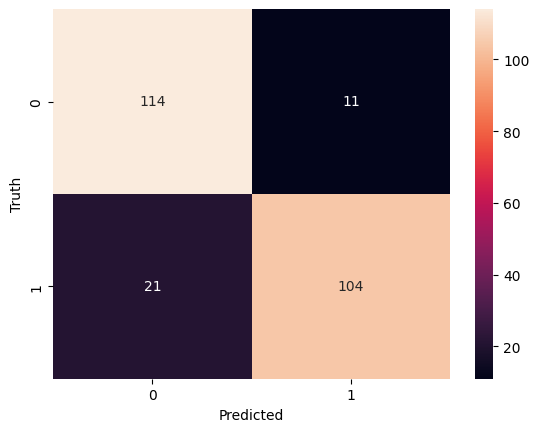

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       125
           1       0.90      0.83      0.87       125

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



In [ ]:
text_for_pred = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    "Mimikyu is so cute!!! I love all pokemon!!!",
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your .",
    "I'm feeling so unwell now",
    "I have waited so long to see the doctor",
    "Damn cursed covid. I'm having horrible headache",
    "My girlfriend was just diagnosed with hiv. What should I do?"
]
model.predict(text_for_pred)

1/1 [==============================] - 5s 5s/step


array([[0.48464558],
       [0.4650946 ],
       [0.35854733],
       [0.4613768 ],
       [0.65110266],
       [0.7007016 ],
       [0.71445686],
       [0.6774681 ],
       [0.5488066 ],
       [0.6362759 ]], dtype=float32)

In [ ]:
pred = model.predict(text_for_pred)
pred_flattened = pred.flatten()
pred_flattened

1/1 [==============================] - 4s 4s/step


array([0.48464563, 0.35854733, 0.4613768 , 0.6511026 , 0.7007016 ],
      dtype=float32)

In [ ]:
import os

In [ ]:
model_path = "/content/drive/My Drive/Colab Notebooks/DESN9002/model_disease.tf"
model.save(model_path)

In [ ]:
new_model = tf.keras.models.load_model(model_path)

In [ ]:
new_pred = new_model.predict(text_for_pred)
new_pred

1/1 [==============================] - 6s 6s/step


array([[0.48464558],
       [0.4650946 ],
       [0.35854733],
       [0.4613768 ],
       [0.65110266],
       [0.7007016 ],
       [0.71445686],
       [0.6774681 ],
       [0.5488066 ],
       [0.6362759 ]], dtype=float32)

In [ ]:
new_model.predict([' The Director of the Gaza Baptist Hospital EXPOSES that prior to the bombing today, Israel told them:  “We warned you yesterday with two bombs. Why have you not evacuated the hospital until this moment?” Israel did it.',
                   'BRO SOMEONE AT DISNEY HAVE TO BE FIRED...',
                   'To prevent this, when you fly too low, instead of slamming into civilians like a jet, he should just reach out his hand to high five them as he passes Quote',
                   ])

1/1 [==============================] - 1s 1s/step


array([[0.648069  ],
       [0.24627486],
       [0.6714222 ]], dtype=float32)